# Exemplo de código para solução do modelo SIR
### Premissas:
- Sem demografia
- População homogênea

### Sistema de equações diferenciais:
Denotando as frações de indivíduos suscetíveis, infectados e removidos por $S$, $I$ e $R$, respectivamente. Considerando uma taxa de propagação $\lambda$ e uma taxa de recuperação $\mu$ o sistema de equações diferenciais que descreve a evolução temporal desta dinâmica é dado por:

$$\dfrac{dS}{dt} = -\lambda S I$$

$$\dfrac{dI}{dt} = \lambda S I - \mu I$$

$$\dfrac{dR}{dt} = \mu I$$

### Comentário:
Os parâmetros utilizados nestes examplos foram escolhidos unicamente para facilitar a visualização.

In [1]:
# Importando as bibliotecas necessárias

import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 26})  # increase the font size

### Função que define o sistema de equações diferenciais 

In [2]:
def SIR (State, t):
    # State = [S, I, R]
        
    S = -lambdaRate*State[0]*State[1];
    I = lambdaRate*State[0]*State[1] - muRate*State[1];
    R = muRate*State[1];
    
    return [S, I, R];

### Primeiro exemplo: parâmetros constantes no tempo
Definição dos parâmetros, condições iniciais e resolução do sistema

In [3]:
# Parameters
lambdaRate = 5;
muRate = 1.0;

# Initial conditions
I_0 = 0.01;
R_0 = 0.0;
S_0 = 1.0 - I_0 - R_0;
y_0 = [S_0, I_0, R_0];

# time
t = np.linspace(0,7,1000)

yo = odeint(SIR, y_0, t);

Plotando os resultados:

Uma vez que $S+I+R = 1$ a curva de suscetíveis não foi mostrada.

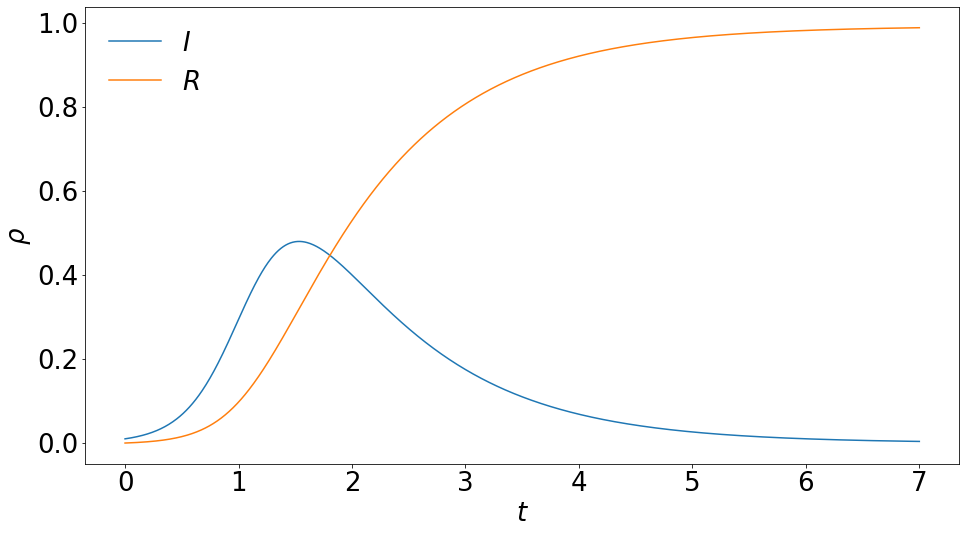

In [4]:
plt.figure(figsize=(14, 8));
# plt.plot(t, yo[:,0], label=r'$S$')
plt.plot(t, yo[:,1], label=r'$I$')
plt.plot(t, yo[:,2], label=r'$R$')
plt.legend(frameon=False);

plt.xlabel(r'$t$');
plt.ylabel(r'$\rho$');

# Saving figure
plt.tight_layout();
plt.savefig("SIR_0.pdf")

#### Comentário:
Note que a curva de infectados apresenta apenas um pico e que o crescimento do número de infectados é aproximadamente exponencial durante a primeira fase da propagação.


### Segundo Exemplo: parâmetros variáveis no tempo
Neste exemplo nós avaliamos o efeito de uma eventual redução do parâmetro de propagação $\beta$, modelando uma uma redução do número de contatos. Esta pode ser um efeito de uma quarentena ou outro tipo de medida de distânciamento.

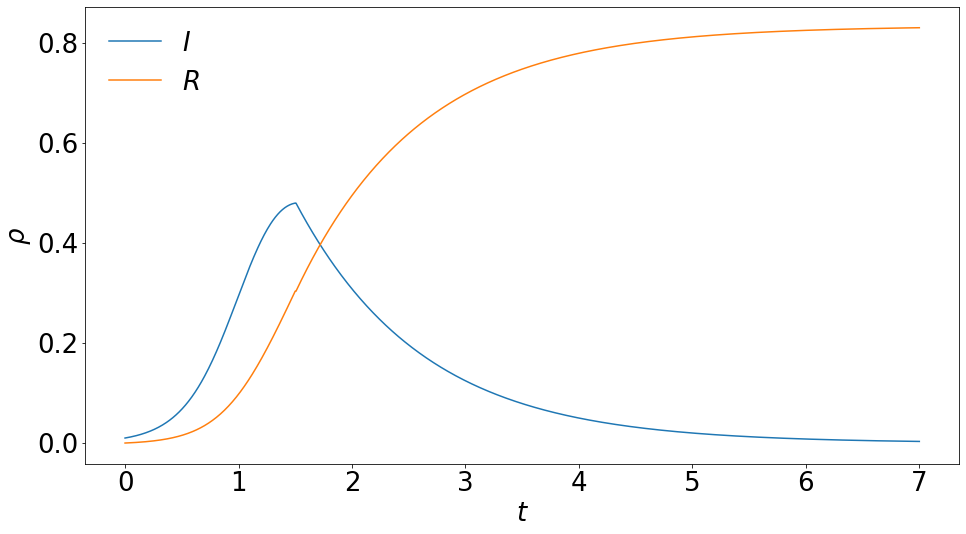

In [5]:
# Parameters
lambdaRate = 5;
muRate = 1.0;

# Initial conditions
I_0 = 0.01;
R_0 = 0.0;
S_0 = 1.0 - I_0 - R_0;
y_0 = [S_0, I_0, R_0];

# time
t = np.linspace(0,7,1000)

t2 = 1.5;
y1 = odeint(SIR, y_0, t[t<t2]);

# Parameters
lambdaRate = 0.5;
muRate = 1.0;
y2 = odeint(SIR, y1[-1,:], t[t>=t2]);

y = np.vstack((y1,y2));

plt.figure(figsize=(14, 8));
# plt.plot(t, y[:,0], label=r'$S$')
plt.plot(t, y[:,1], label=r'$I$')
plt.plot(t, y[:,2], label=r'$R$')
plt.legend(frameon=False);

plt.xlabel(r'$t$');
plt.ylabel(r'$\rho$');

# Saving figure
plt.tight_layout();
plt.savefig("SIR_1.pdf")

#### Comentário:
Se comparamos esta curva com a anterior, verificamos que após a mudança de parâmetros, $t_2 = 1.5$ a curva imediatamente para de crescer e apresenta um decaímento exponencial.
Isto acontece, pois o novo valor da taxa de propagação $\lambda$ não é suficiente para manter o crescimento desta curva. De fato, intuitivametne podemos observar que a taxa de recuperação, $\mu = 1$ é maior que a nova taxa de propagação $\lambda(t_2) = 0.5$. Assim, esperasse que a doença começe a desapararecer.

### Terceiro exemplo: Parâmetros variáveis no tempo - "Achatar a curva"
Neste exemplo nós avaliamos os efeito de uma eventual redução do parâmetro de propagação $\beta$, considerando que este pode ser reduzido por um intervalo de tempo limitado. Um exemplo seria uma quarentena por um tempo limitado seguido de um período sem restrições.


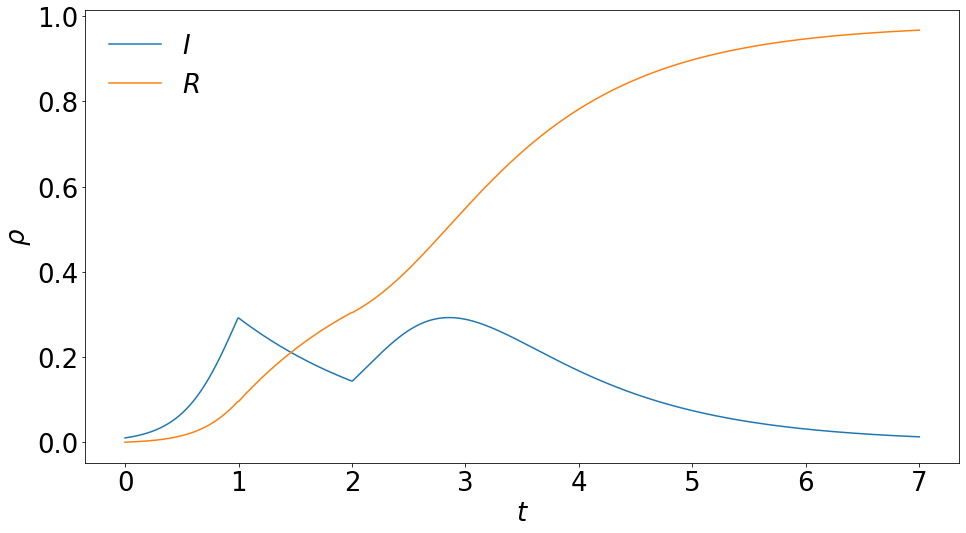

In [6]:
# Initial conditions
I_0 = 0.01;
R_0 = 0.0;
S_0 = 1.0 - I_0 - R_0;
y_0 = [S_0, I_0, R_0];

# time
t = np.linspace(0,7,1000)
t2 = 1.;
t3 = 2;


# Parameters
lambdaRate = 5;
muRate = 1.0;

y1 = odeint(SIR, y_0, t[t<t2]);

# Parameters
lambdaRate = 0.5;
muRate = 1.0;

y2 = odeint(SIR, y1[-1,:], t[np.logical_and(t>=t2, t<t3)]);

# Parameters
lambdaRate = 5;
muRate = 1.0;

y3 = odeint(SIR, y2[-1,:], t[t>=t3]);

y = np.vstack((y1,y2, y3));

plt.figure(figsize=(14, 8));
# plt.plot(t, y[:,0], label=r'$S$')
plt.plot(t, y[:,1], label=r'$I$')
plt.plot(t, y[:,2], label=r'$R$')
plt.legend(frameon=False);

plt.xlabel(r'$t$');
plt.ylabel(r'$\rho$');

# Saving figure
plt.tight_layout();
plt.savefig("SIR_2.pdf")

#### Comparando os modelos com paâmetros variáveis ("curva achatada") com o modelo de parametros constantes

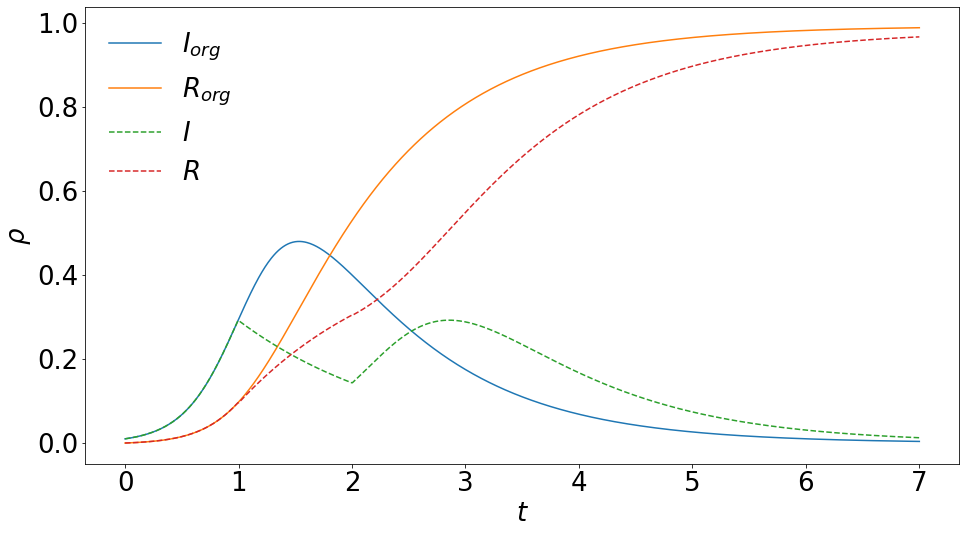

In [7]:
plt.figure(figsize=(14, 8));
plt.plot(t, yo[:,1], label=r'$I_{org}$')
plt.plot(t, yo[:,2], label=r'$R_{org}$')

plt.plot(t, y[:,1], "--", label=r'$I$')
plt.plot(t, y[:,2], "--", label=r'$R$')

plt.legend(frameon=False);

plt.xlabel(r'$t$');
plt.ylabel(r'$\rho$');

# Saving figure
plt.tight_layout();
plt.savefig("SIR_3.pdf")

#### Comentário:
É interessante comparar os resultados da curva comparâmetros constantes e a curva "achatada".
Note que em um primeiro momento ambas tem o mesmo comportamento. Entretanto, apesar de apresentarem valores finais parecidos(estados para $t = 7$ neste experimento), o pico é significativamente reduzido.